In [78]:
# Starting with data preparation 
# Link for dataset: https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



file_path = '/Users/neelapatil/Downloads/customer_churn_data.csv'

data = pd.read_csv(file_path)

data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [85]:
# Now we shall do some data cleaning (dropping duplicates and checing for any missing values)

data.drop_duplicates(inplace=True)
data['InternetService'].fillna('Unknown', inplace=True)
data.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [86]:
# As we can see our data is free of any issues, so we can now summarise some basic details abnout our data. 

# We can observe the mean for every numerical catogory and many more attributes

data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [87]:
Q1 = data['Tenure'].quantile(0.25)
Q3 = data['Tenure'].quantile(0.75)
IQR = Q3 - Q1

outliers1 = data[(data['Tenure'] < (Q1 - 1.5 * IQR)) | (data['Tenure'] > (Q3 + 1.5 * IQR))]

print(outliers1)

     CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
18           19   35    Male      98           49.59        Two-Year   
29           30   42    Male      62           97.66        Two-Year   
112         113   45  Female      88           51.73  Month-to-Month   
119         120   52  Female      66           80.96  Month-to-Month   
131         132   45  Female      62           86.22  Month-to-Month   
..          ...  ...     ...     ...             ...             ...   
800         801   54  Female      75           31.23        Two-Year   
832         833   34  Female      60           56.62  Month-to-Month   
896         897   43  Female      61           75.00        One-Year   
941         942   53    Male      64           98.99        One-Year   
998         999   39    Male      68           65.67        One-Year   

    InternetService  TotalCharges TechSupport Churn  
18      Fiber Optic       4859.82         Yes    No  
29      Fiber Optic       6

In [88]:
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

outliers2= data[(data['TotalCharges'] < (Q1 - 1.5 * IQR)) | (data['TotalCharges'] > (Q3 + 1.5 * IQR))]

print(outliers2)

     CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
18           19   35    Male      98           49.59        Two-Year   
29           30   42    Male      62           97.66        Two-Year   
60           61   40  Female      46           92.65  Month-to-Month   
98           99   45    Male      44          111.09        Two-Year   
112         113   45  Female      88           51.73  Month-to-Month   
119         120   52  Female      66           80.96  Month-to-Month   
131         132   45  Female      62           86.22  Month-to-Month   
136         137   37  Female      82           98.11  Month-to-Month   
138         139   53    Male      64           93.67  Month-to-Month   
155         156   37  Female      67           90.73        One-Year   
164         165   54    Male     101           54.78  Month-to-Month   
175         176   53  Female      66          100.12        Two-Year   
189         190   29    Male      79           83.36        One-

In [58]:
outliers1.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,470.540984,43.868852,71.163934,75.237213,5359.765246
std,246.571462,9.111303,13.155709,26.283184,2201.394548
min,19.000000,22.000000,58.000000,30.970000,2027.400000
25%,258.000000,37.000000,62.000000,54.780000,3720.600000
50%,491.000000,45.000000,67.000000,75.140000,4859.820000
75%,668.000000,51.000000,77.000000,97.660000,6607.920000
max,999.000000,62.000000,122.000000,119.280000,12416.250000


In [89]:
outliers2.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,453.385965,44.122807,65.228070,95.283509,6076.132982
std,274.534265,8.341099,17.711999,18.570815,1698.702007
min,19.000000,24.000000,38.000000,49.590000,4261.900000
25%,211.000000,38.000000,53.000000,82.490000,4747.210000
50%,443.000000,45.000000,64.000000,98.110000,5595.200000
75%,668.000000,51.000000,72.000000,112.870000,6738.440000
max,999.000000,60.000000,122.000000,119.280000,12416.250000


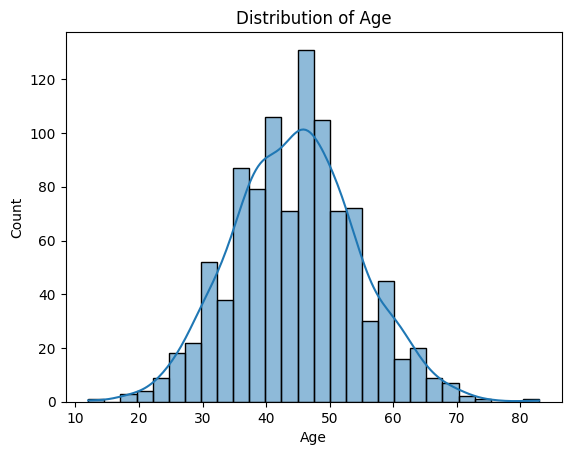

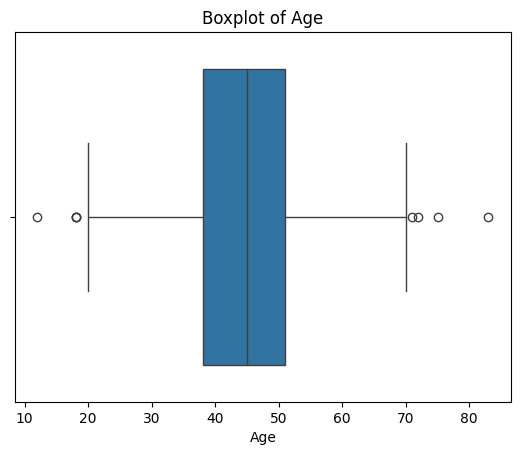

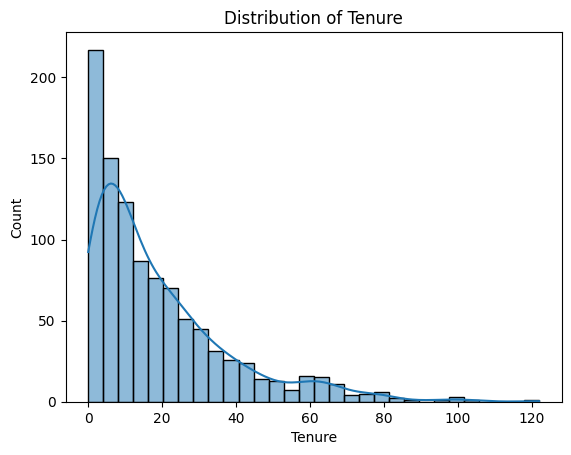

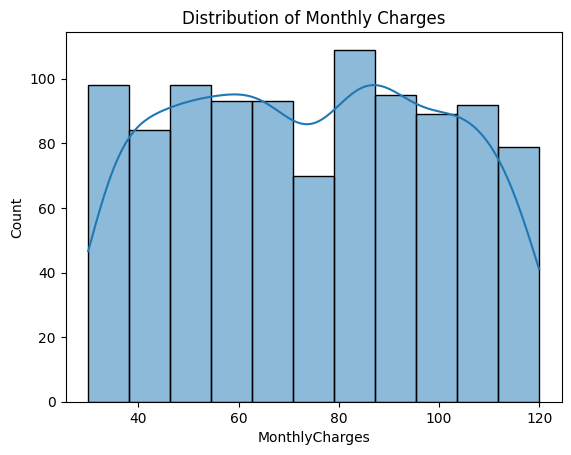

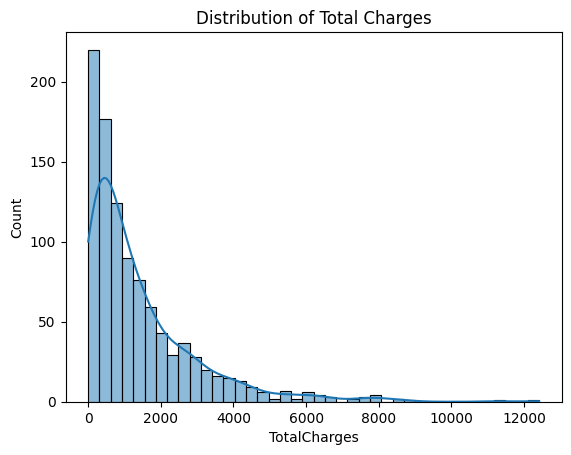

In [90]:
# We have calculated the outliers for Tenure and Total Charges, which are both essential here as:

# Outliers in Tenure help us show customers who have either been using the services for long, useful for churn analysis and the other being new customers who have just signed up for the services.

# Outliers in Total Charges also help us with churn analysis, as high spending customers show a loyal, trusting customer who is less likely to churn, whereas those who spend less are more prone to churning.

# There are 61 outliers for Tenure and 57 for Total Charges, indicating a very small amount of people are new/loyal, and very few are extreme spenders.

# Moving onto data mining i.e the actual analysis of our data

# Univariate:

sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

# As we can see, Age is normally distributed (around 40-50) whereas Tenure and Total Charges are right-skewed. Right skew here indicates that our customers are relatively new (shorter tenure) and correspondingly they have lower total charges too.
# (Boxplots help us find the outliers and IQR)

sns.histplot(data['Tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.show()

sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

sns.histplot(data['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.show()


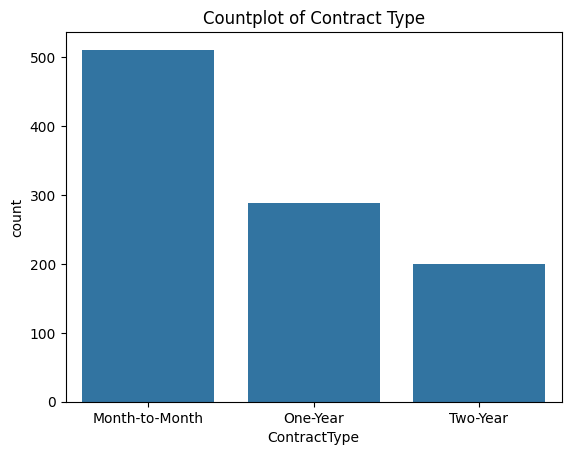

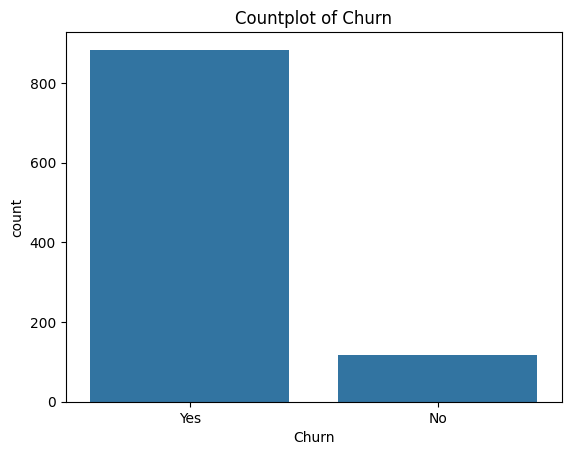

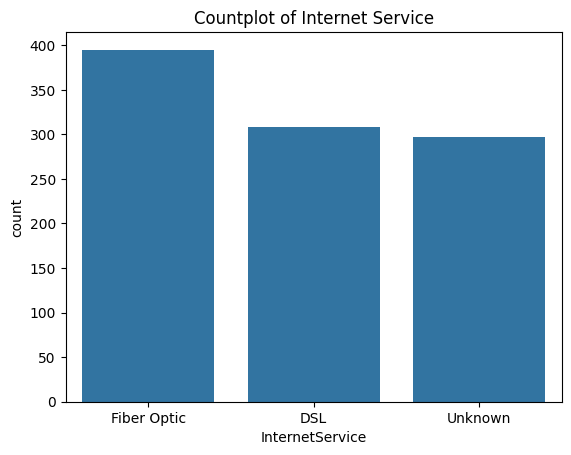

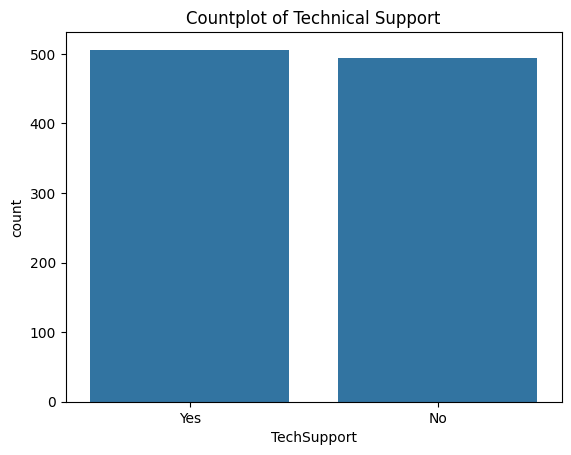

In [91]:
sns.countplot(x='ContractType', data=data)
plt.title('Countplot of Contract Type')
plt.show()

sns.countplot(x='Churn', data=data)
plt.title('Countplot of Churn')
plt.show()

# Churning is a major issue we need to address.

sns.countplot(x='InternetService', data=data)
plt.title('Countplot of Internet Service')
plt.show()


sns.countplot(x='TechSupport', data=data)
plt.title('Countplot of Technical Support')
plt.show()

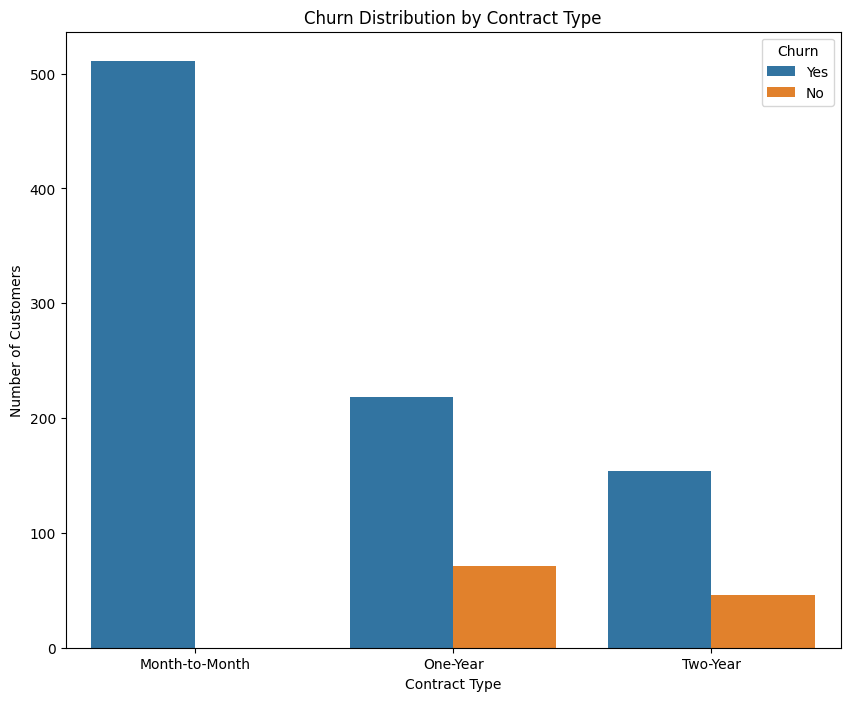

In [92]:
# Multivariate:

plt.figure(figsize=(10, 8))

sns.countplot(x='ContractType', hue='Churn', data=data)


plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

plt.show()

# As we can notice, all the people with monthly contracts have churned, indicating that there may be some issue with the monthly subscription. 

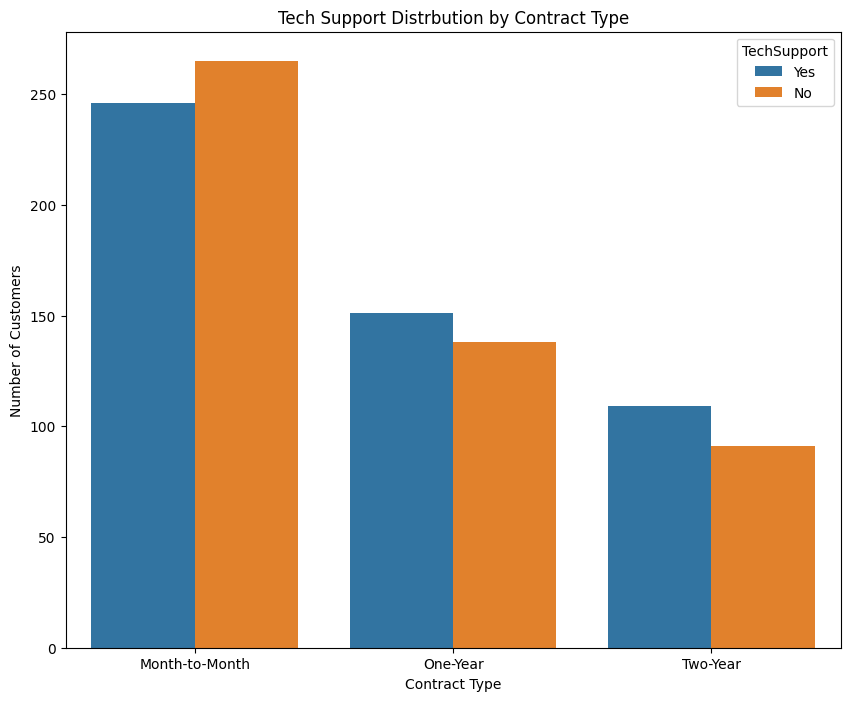

In [93]:
plt.figure(figsize=(10, 8))

sns.countplot(x='ContractType', hue='TechSupport', data=data)


plt.title('Tech Support Distrbution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

plt.show()

# We dont observe anything drastic here. This can also indicate that the current tech support is not influencing or helping people much, that is it needs to be worked on or improved.


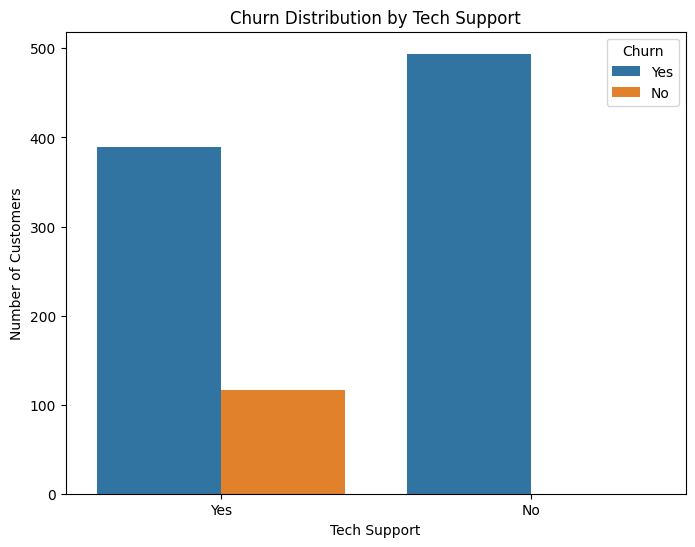

In [94]:
plt.figure(figsize=(8, 6))

sns.countplot(x='TechSupport', hue='Churn', data=data)

plt.title('Churn Distribution by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')

plt.show()

# We can see that people with no tech support are very likely to churn, and those who churn with tech support are high in number, indicating that the tech support is very inefficient.

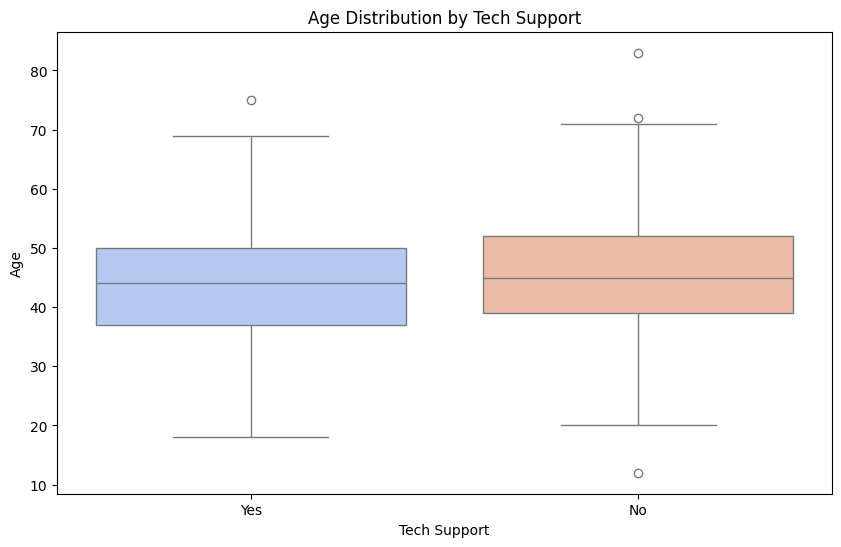

In [95]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='TechSupport', y='Age', hue='TechSupport', data=data, palette='coolwarm', legend=False)

plt.title('Age Distribution by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Age')

plt.show()

# As we can see from the graph, age is not a major differentiating factor in whether customers opt for tech support or not. Customers in this age group 40-50, regardless of whether they use tech support or not, are dominant in the customer base.


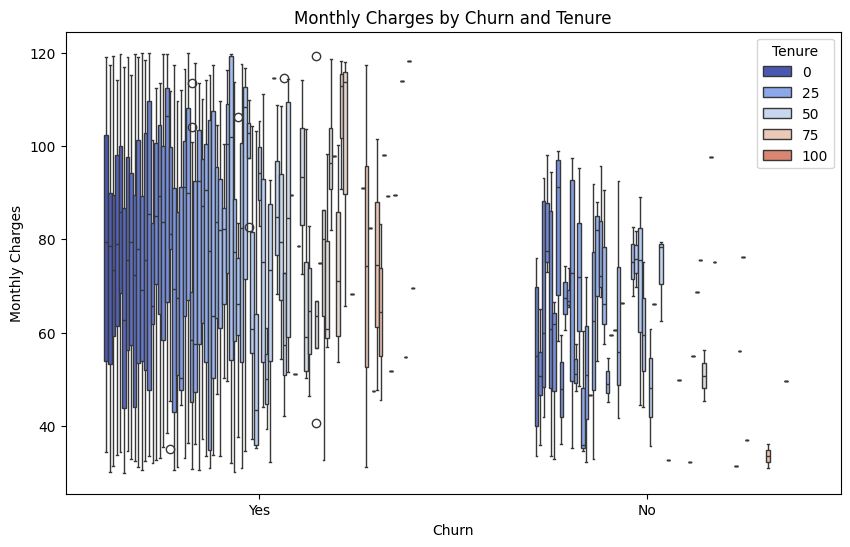

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Tenure', data=data, palette='coolwarm')
plt.title('Monthly Charges by Churn and Tenure')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# As we can see people with lower tenures are very prone to churning, and it is evident that the higher charges are also likely to churn. People with lower charges are less likely to churn.


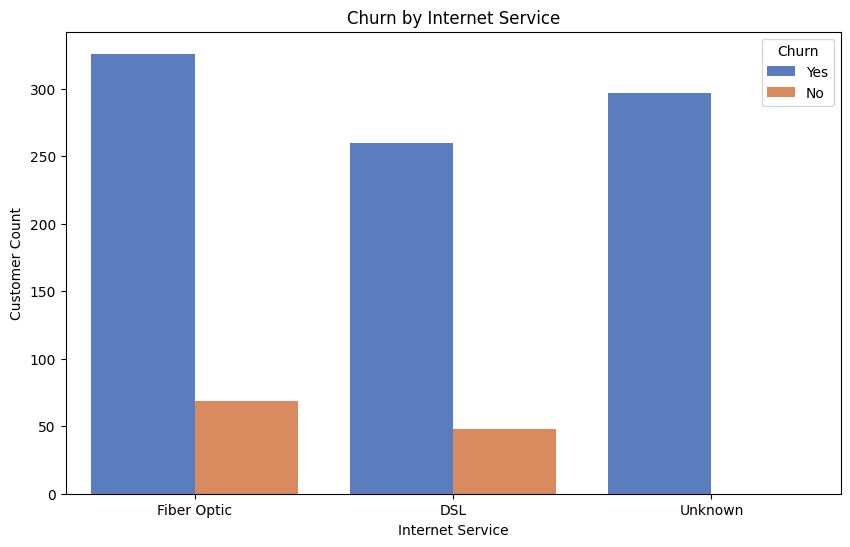

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='muted')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')
plt.show()

# As we can see, regardless of the internet services, there is still a huge proportion of customers churning, which implies that there is no underlying issue with internet services.


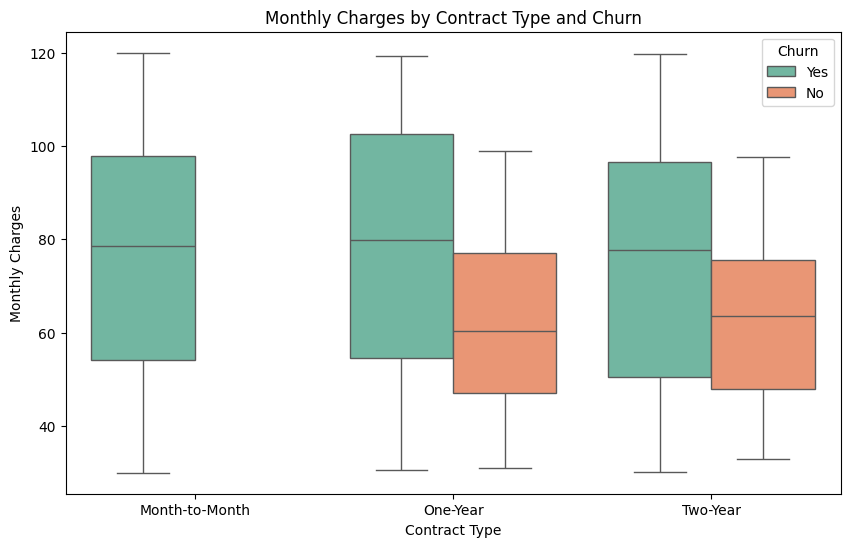

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ContractType', y='MonthlyCharges', hue='Churn', data=data, palette='Set2')
plt.title('Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='muted')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')
plt.show()

# Maybe for customers opting for one/two year contracts, it would be better to lower the monthly charges (below 80), as a loyal customer base would be less likely to churn if so.


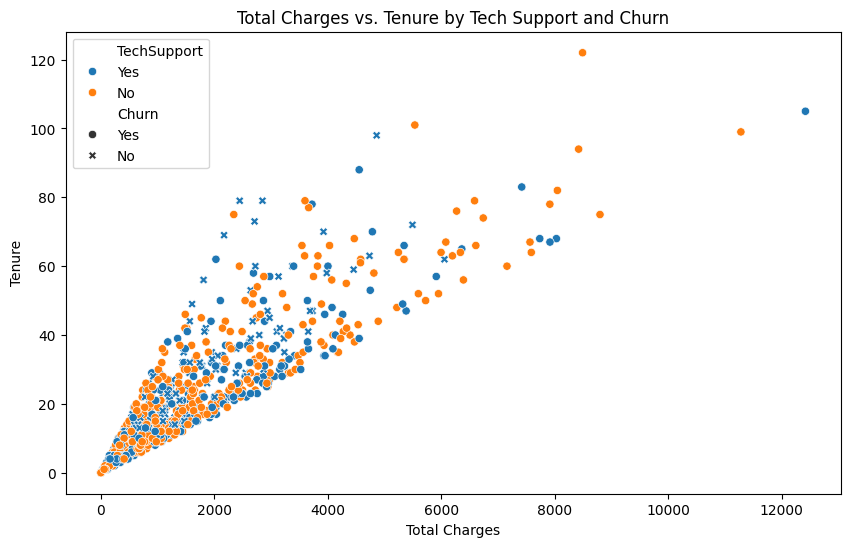

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='Tenure', hue='TechSupport', style='Churn', data=data)
plt.title('Total Charges vs. Tenure by Tech Support and Churn')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.show()

# Higher tenure and higher charges indicate a more loyal customer base, who are very less likely to churn.

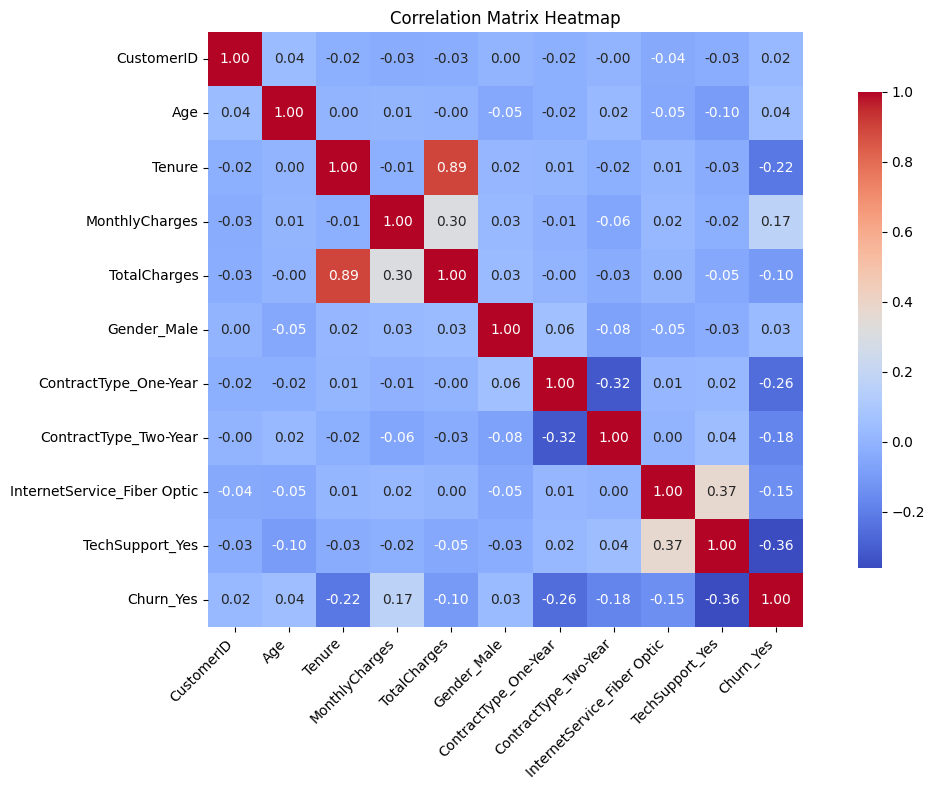

In [114]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# We can see gender doesnt have an impact on churn, whereas tenure and tech support seem to have an impact. Also people with optic fibres seem to have tech support.

In [ ]:
# From various analysis, we can come to the following conclusions:

# 1. Tech support seems to have no impact on the customers, implementing that they need to improve their services in this aspect, as to aid those getting the support and prevent churning.
# 2. Age and gender have no effect.
# 3. Basically, tenure, monthly charges, contract types, tech support are the main factors that are influencing the churn. 